### $\color{royalblue}{\text{ Druga vježba iz numeričkih metoda u astronomiji (NMA), datum: 24.10.2024.}} $

### Uvozimo potrebne biblioteke.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from astropy.io import fits

### $\color{magenta}{\text{1. Operacije sa fits fajlom; zanimljiv primjer.}}$

In [5]:
podaci = fits.open('gll_iem_v02_P6_V11_DIFFUSE.fit')
podaci.info()

Filename: gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [5]:
podaci[0].header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

In [11]:
podaci[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    8 / width of table in bytes                        
NAXIS2  =                   30 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    1 / number of fields in each row                   
TTYPE1  = 'Energy  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
EXTNAME = 'ENERGIES'           / name of this binary table extension            
CHECKSUM= 'LALON5IOLAIOL3IO'   / HDU checksum updated 2009-07-07T22:31:18       
DATASUM = '3169948818'      

### a) Učitavanje podataka.

In [6]:
 # mapa intenziteta zracenja na odgovarajucoj energiji u galaktickim koordinatama
intenzitet = podaci[0].data

# energije za koje su date mape
energija = podaci[1].data 

print(intenzitet.shape, energija.shape)

(30, 360, 720) (30,)


### b) Pravljenje koordinatne mreže.

In [7]:
longituda = np.arange(-180, 180, step = 0.5)
latituda = np.arange(90, -90, step = -0.5)
longituda, latituda = np.meshgrid(longituda,latituda)

### c) Konture na nekoj od datih energija.

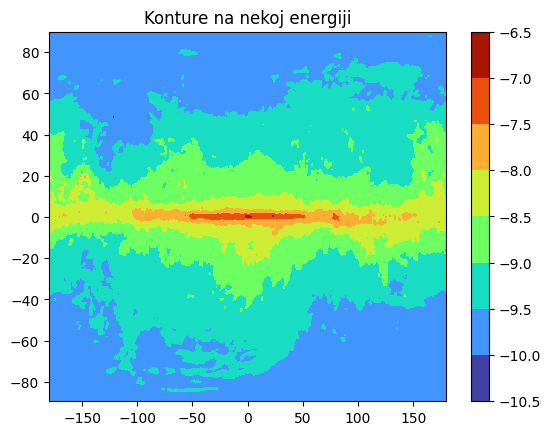

In [8]:
plt.contourf(longituda, latituda, np.log10(intenzitet[13]), cmap='turbo')
plt.colorbar()
plt.title('Konture na nekoj energiji')
plt.show()

### d) Konture na svim datim energijama.

Ovdje možete probati da stavite zajednički colorbar za sve subplotove ili da pojedinačni colorbarovi imaju neko
univerzalno skaliranje.

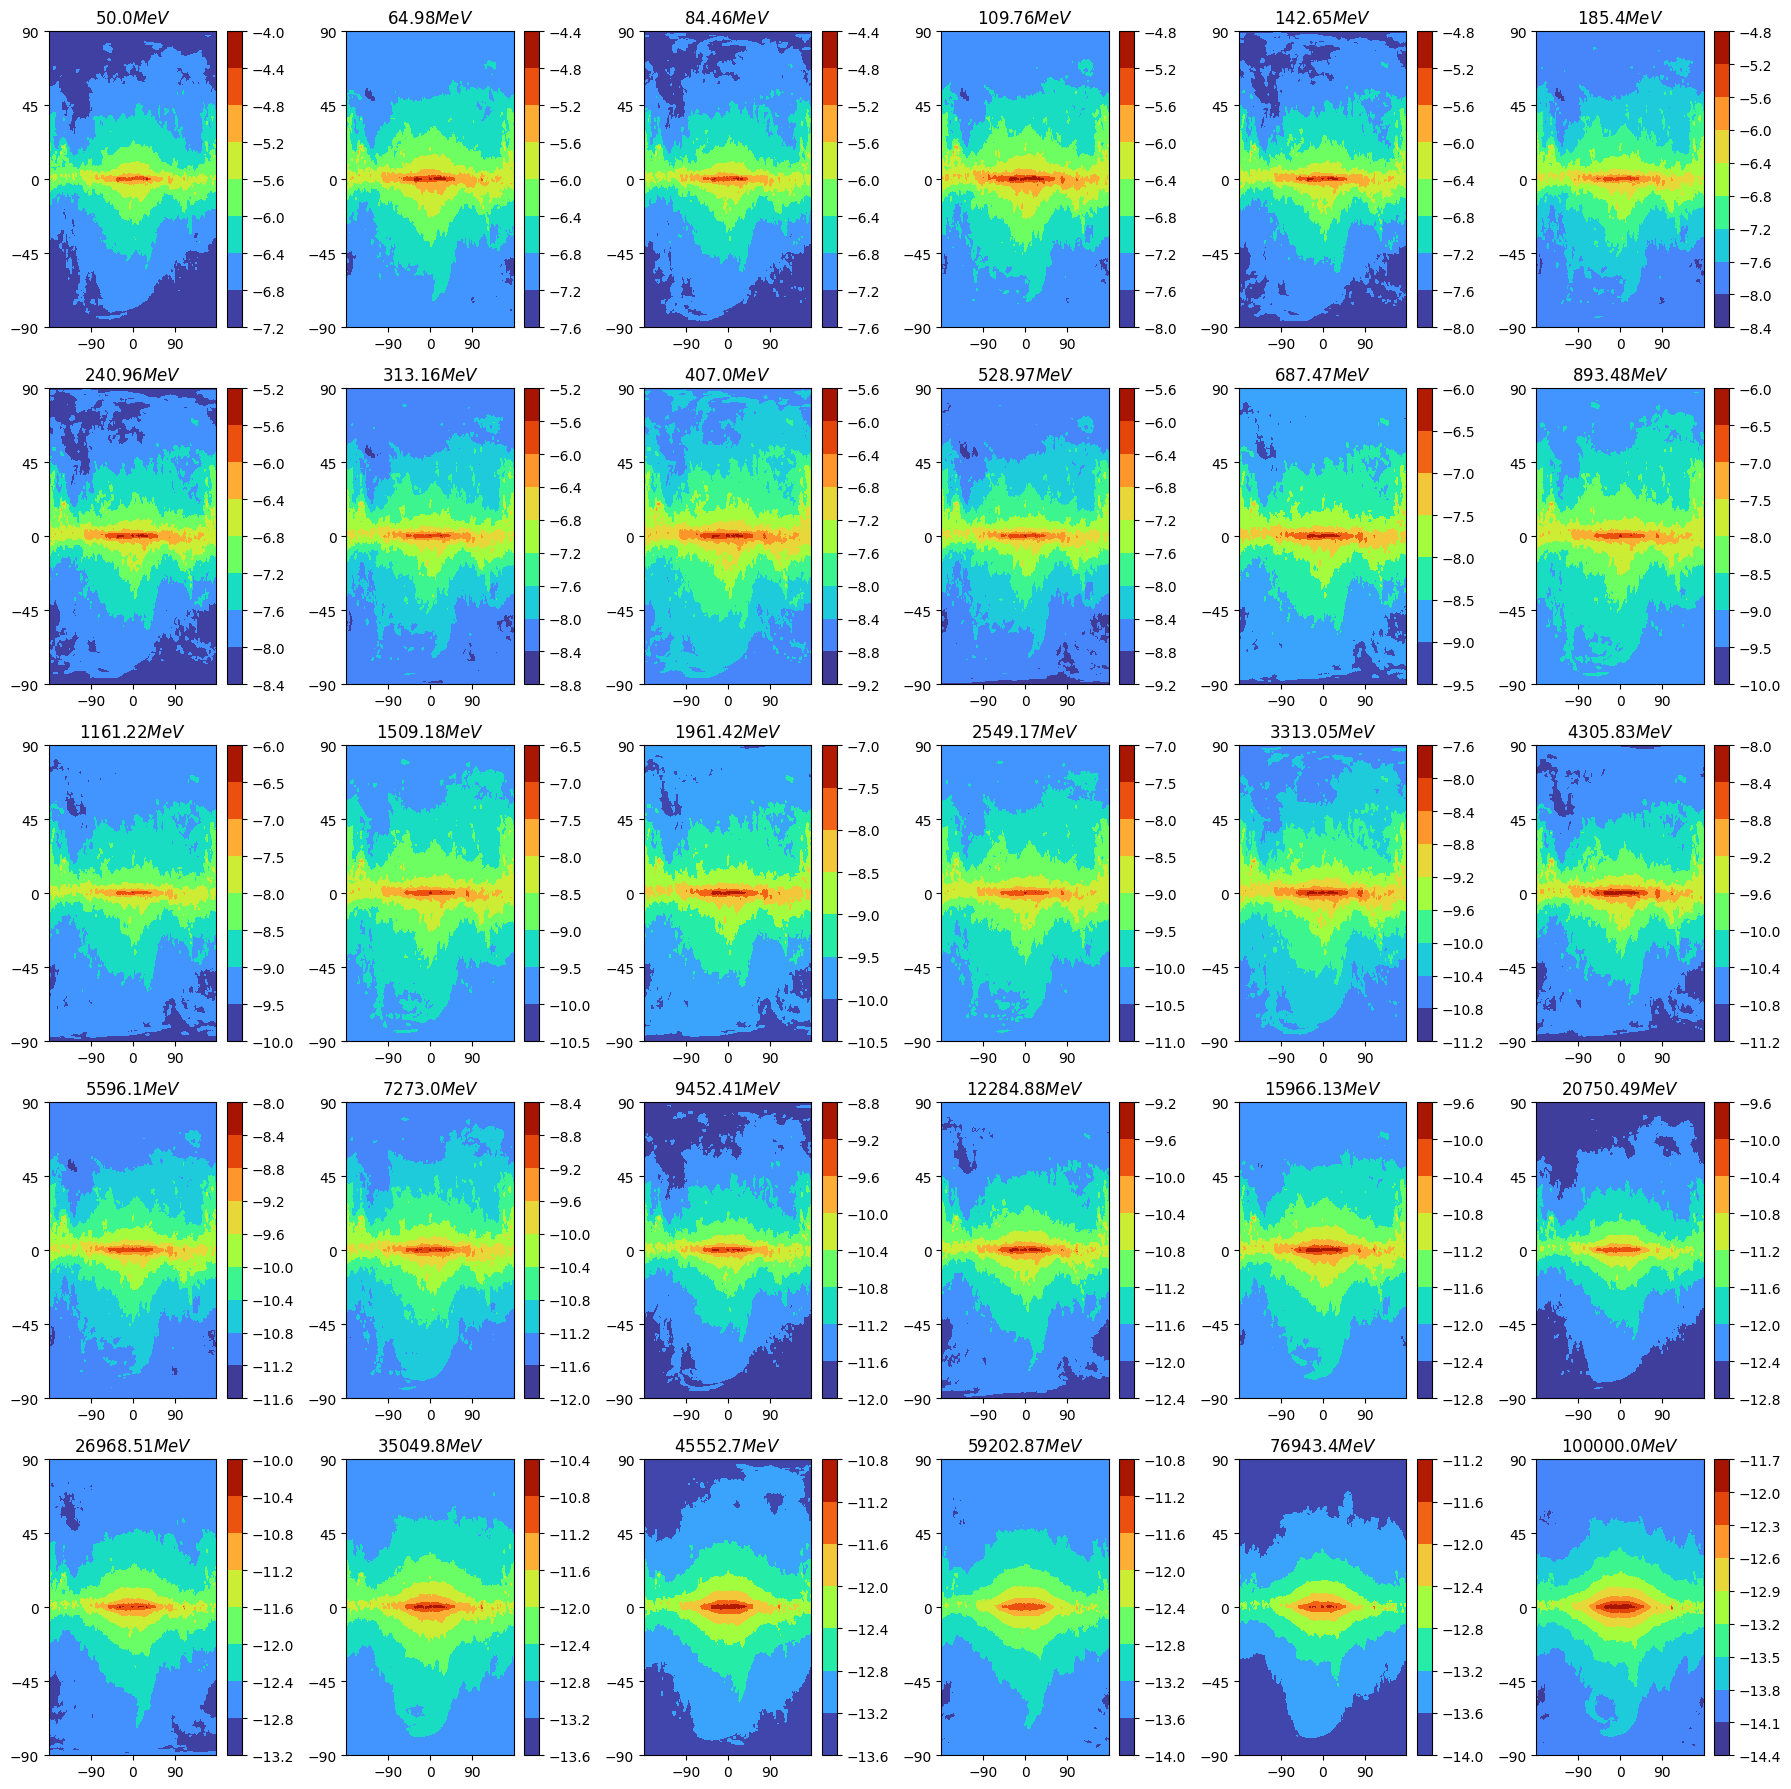

In [10]:
fig, axs = plt.subplots(5, 6, figsize=(18, 18))

for i in range(30):
    red = int(np.floor(i / 6))
    kolona = i - (red) * 6
    im = axs[red, kolona].contourf(longituda, latituda, np.log10(intenzitet[i]), cmap='turbo')
    axs[red, kolona].title.set_text(r'${} MeV$'.format(np.round(energija[i][0], 2)))
    axs[red, kolona].set_xticks(np.arange(-90, 180, step=90))
    axs[red, kolona].set_yticks(np.arange(-90, 135, step=45))
    
    plt.colorbar(im)

# plt.suptitle('Konture na svim datim energijama', fontsize=16)
plt.tight_layout()

### $\color{magenta}{\text{2. Spektar Sunčevog zračenja.}}$

Dužina niza talasnih dužina: 2001


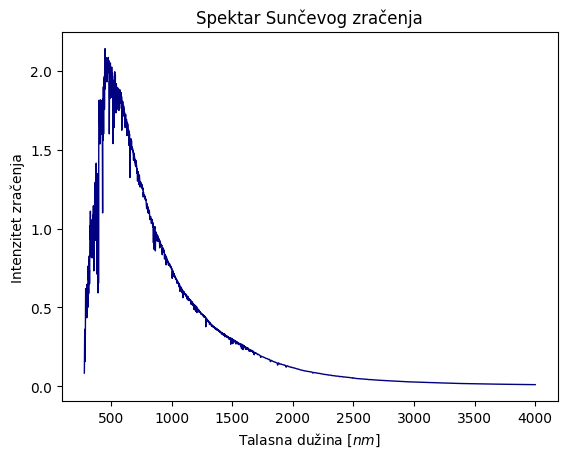

Srednji intenzitet zračenja: 0.677633728135932


In [4]:
l, I=np.loadtxt('Spektar Sunca.txt',delimiter=',', skiprows=2, unpack=True)

print('Dužina niza talasnih dužina:', len(l))

plt.plot(l, I, color='navy', linewidth=1)
plt.xlabel(r'Talasna dužina $[nm]$')
plt.ylabel('Intenzitet zračenja')
plt.title('Spektar Sunčevog zračenja')
plt.show()

print('Srednji intenzitet zračenja:', np.mean(I))

### $\color{magenta}{\text{3. Mjesečeva kora - primjer.}}$
Nešto detaljniji prikaz "igranja" sa konturama.

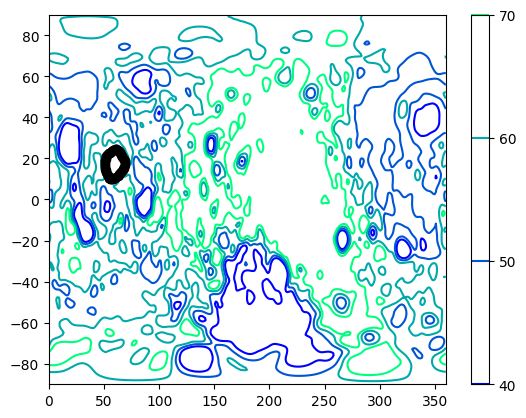

In [21]:
D = np.loadtxt('Moon_crust.dat')
D = np.reshape(D,[180,360])

longituda=np.linspace(0,360,360)
latituda=np.linspace(-90,90,180)
  
X, Y = np.meshgrid(longituda, latituda)

# colormaps: binary, bone, pink, spring, summer, winter, cool, hot, copper, jet

mapa_boja = plt.colormaps.get_cmap('winter')

# numerički izlaz iz kontura

nivoi = np.arange(40,80,10) # definišemo nivoe na kojima zelimo da plotujemo konture
konture = plt.contour(X,Y,D,levels=nivoi,cmap=mapa_boja) # plotujemo konture na zadatim nivoima
koordinate = konture.allsegs
nivo0 = koordinate[0] # indeks nam govori na kom smo nivou (u ovom slucaju na 40 m)
kontura = nivo0[14] # indeks nam govori koji smo segment (konturu) izabrali na tom nivou

# Na ovaj način mozemo da odredimo sve tačke na nekoj 2D mapi podataka koje su na istom nivou

longituda0 = kontura[:,0] # latitude tačaka na debljini 40 m 
latituda0 = kontura[:,1] # longitude ta-aka na debljini 40 m
plt.plot(longituda0, latituda0, marker='o', color='black') # plotovanje tih tačaka na istoj mapi
plt.colorbar()
plt.show()

### Neke druge projekcije.
Predlažem da isprobate ove različite projekcije...

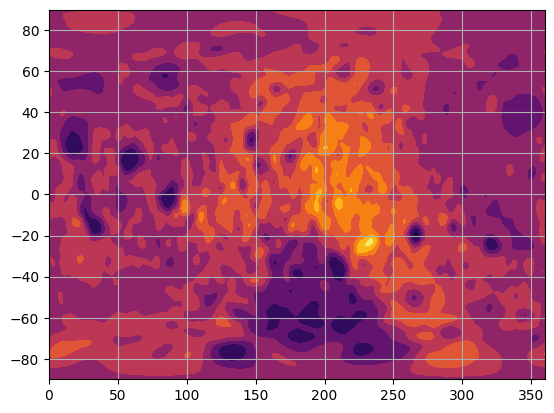

In [34]:
projekcija=plt.subplot(1,1,1, projection = 'rectilinear')
# projekcija=plt.subplot(1,1,1, projection = 'hammer')
# projekcija=plt.subplot(1,1,1, projection = 'aitoff')
# projekcija=plt.subplot(1,1,1, projection = 'mollweide')
# projekcija = plt.subplot(projection = 'lambert')

mapa_boja = plt.colormaps.get_cmap('inferno')
projekcija.contourf(X, Y, D, cmap = mapa_boja)

plt.grid()
plt.show()

### $\color{magenta}{\text{4. Topografija Marsa.}}$

### a) Učitavanje podataka i pravljenje mreže longituda i latituda. Plotovanje raznih stvari.

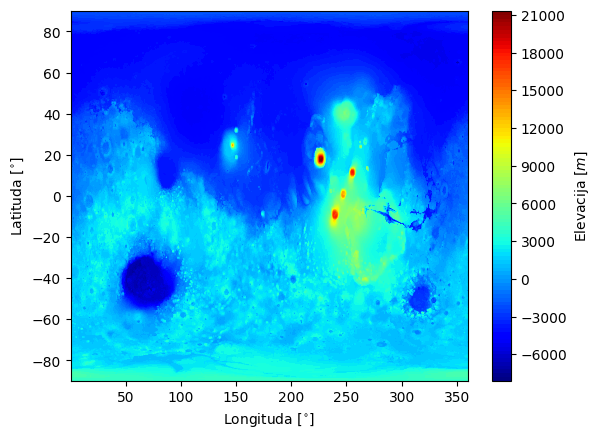

In [2]:
h = np.loadtxt('topografija.dat', skiprows=2)
r = np.loadtxt('radijus.dat')

longituda=np.arange(0.125, 360, step=0.25)
latituda=np.arange(-89.875, 90, step=0.25)
longituda, latituda=np.meshgrid(longituda, latituda)

# PLOTOVANJE KONTURA (sa prozivoljnim brojem)

plt.contourf(longituda, latituda, h, 100, cmap='jet')
cbar=plt.colorbar()
cbar.set_label(r'Elevacija $[m]$')
plt.xlabel(r'Longituda $[^{\circ}]$')
plt.ylabel(r'Latituda $[^{\circ}]$')
plt.show()

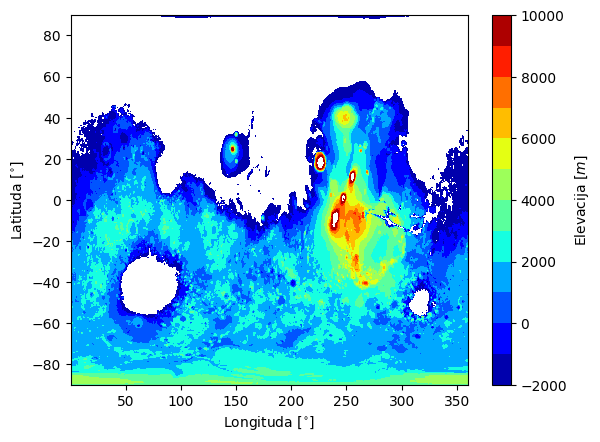

In [37]:
# PLOTOVANJE KONTURA (na tačno definisanim nivoima)

nivoi=np.arange(-2000, 11000, step=1000)

plt.contourf(longituda, latituda, h, levels=nivoi, cmap='jet')
cbar=plt.colorbar()
cbar.set_label(r'Elevacija $[m]$')
plt.xlabel(r'Longituda $[^{\circ}]$')
plt.ylabel(r'Latituda $[^{\circ}]$')
plt.show()

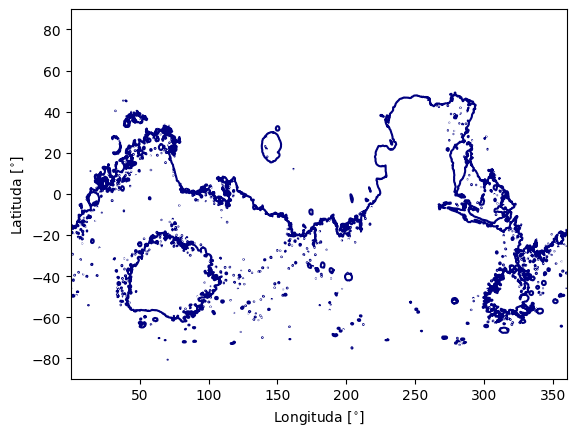

In [45]:
# PLOTOVANJE KONTURA (na nultoj nadmorskoj visini)

konture = plt.contour(longituda, latituda, h,levels=[0], cmap='jet')
 
koordinate=konture.allsegs
nivo0 = koordinate[0] 

plt.xlabel(r'Longituda $[^{\circ}]$')
plt.ylabel(r'Latituda $[^{\circ}]$')
plt.show()

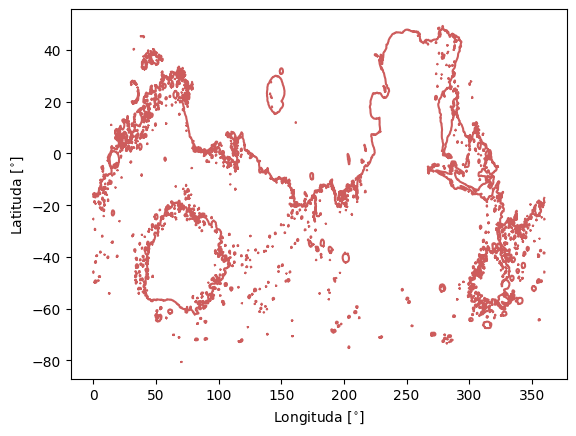

In [43]:
# Ako zelimo sve konture na istom nivou

for i in range(0, len(nivo0)): # broj kontura na debljini od 40m
    kontura = nivo0[i]
    longituda0 = kontura[:,0] # latitude tacaka na debljini 40 m 
    latituda0 = kontura[:,1] # longitude tacaka na debljini 40 m
    plt.plot(longituda0, latituda0, color='indianred') # plotovanje tih tačaka na istoj mapi

plt.xlabel(r'Longituda $[^{\circ}]$')
plt.ylabel(r'Latituda $[^{\circ}]$')
plt.show()

### b) Vježbanje: na topografskoj mapi Marsa plotovati konture "nivoa mora",
### sve ispod obojiti u plavo, a sve iznad u crveno.

/tmp/ipykernel_248224/1380111632.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mapa_boja = plt.cm.get_cmap('turbo')


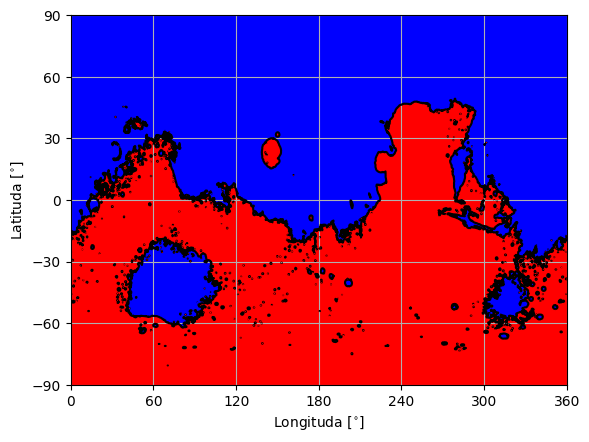

In [47]:
mapa_boja = plt.cm.get_cmap('turbo')
mapa_boja.set_under('blue')
mapa_boja.set_over('red')
plt.contourf(longituda,latituda,h,levels=[0, 0.01],cmap=mapa_boja, extend='both')

# ["neither", "both", "min", "max"]

konture=plt.contour(longituda, latituda, h, levels=[0], colors='black')

plt.xlabel(r'Longituda $[^{\circ}]$')
plt.ylabel(r'Latituda $[^{\circ}]$')

plt.xticks(np.arange(0, 361, step=60))
plt.yticks(np.arange(-90,91, step=30))
plt.grid()
plt.show()

### c) 3D plot.

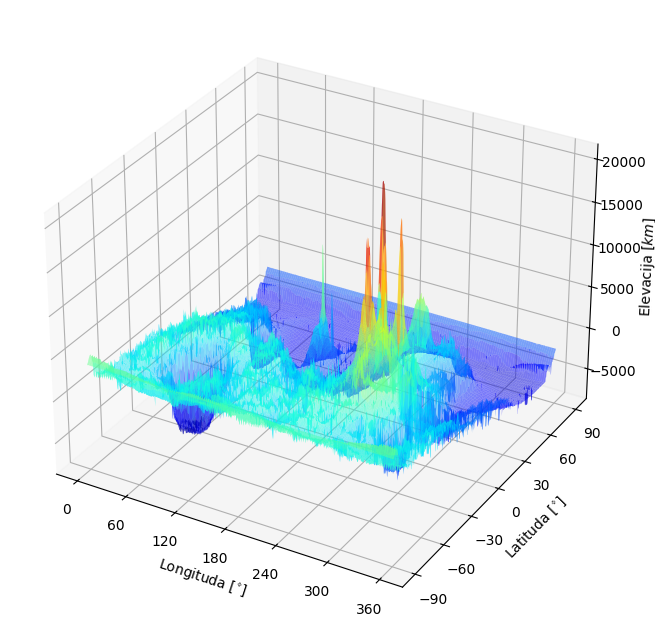

In [48]:
fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(1,1,1, projection='3d')
 
ax.plot_surface(longituda, latituda, h, rstride=10, cstride=10, cmap='jet', alpha=0.5)

#facecolors = cm.jet(h/np.max(h)), alpha=0.5)

ax.set_xticks(np.arange(0,361,step=60))
ax.set_yticks(np.arange(-90,91,step=30))
ax.set_xlabel(r'Longituda $[^{\circ}]$')
ax.set_ylabel(r'Latituda $[^{\circ}]$')
ax.set_zlabel(r'Elevacija $[km]$')

ax.grid()
plt.show()

### d) Sferni plot.
Za vježbu možete dodati nazive osa, sferni grid (?)...

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
 
latituda = np.deg2rad(latituda)
longituda = np.deg2rad(longituda)

r = 3e4 # proizvoljno 

X = r * np.cos(latituda) * np.cos(longituda)
Y = r * np.cos(latituda) * np.sin(longituda)
Z = r * np.sin(latituda)
 
mapa = plt.cm.ScalarMappable(cmap='jet')
boja = mapa.to_rgba(h) # boja prema "nadmorskoj visini"

plot = ax.plot_surface(X, Y, Z,rstride=3, 
                  cstride=3, 
                 cmap=cm.jet, facecolors=boja)

ax.grid('off')

### $\color{green}{\text{ZADACI:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 1. Koristeći fajl 'Spektar Sunca.txt', naći srednji intenzitet zračenja, te talasne dužine na kojima je intenzitet maksimalan 
#### i minimalan. Plotovati srednji  intenzitet zračenja na istom plotu sa $I(\lambda)$, kao horizontalnu liniju.
<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 2.  Ispod se nalazi kratak kod:

import numpy as np

e=0.05

M=2.56
tacnost=1e-8


delta=2*tacnost

E=M

br=0

while np.abs(delta)>tacnost:

    br+=1
    
    f=E-e*np.sin(E)-M
    
    fprim=1-e*np.cos(E)
   
    delta=f/fprim
    
    E=E-delta

print(E)

print(br)

#### Modfikovati kod tako da  računa vrijednosti ekscentrične anomalije za niz vrijednosti srednje anomalije od $0$ do $2π$,
#### za više vrijednosti ekscentriciteta (npr. e = 0.05, 0.2, 0.5).

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />


### $\color{green}{\text{RJEŠENJA:}} $